# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

***Loading the dataset+introductory overview***

In [10]:
import pandas as pd
df=pd.read_csv("recipe_site_traffic_2212.csv")
# Basic overview
print("First 5 rows:")
display(df.head())

print("\nDataset info:")
df.info()

print("\nSummary statistics:")
display(df.describe(include='all'))


First 5 rows:


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB

Summary statistics:


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
count,947.000000,895.000000,895.000000,895.000000,895.000000,947,947,574
unique,NaN,NaN,NaN,NaN,NaN,11,6,1
top,NaN,NaN,NaN,NaN,NaN,Breakfast,4,High
freq,NaN,NaN,NaN,NaN,NaN,106,389,574
mean,474.000000,435.939196,35.069676,9.046547,24.149296,NaN,NaN,NaN
std,273.519652,453.020997,43.949032,14.679176,36.369739,NaN,NaN,NaN
min,1.000000,0.140000,0.030000,0.010000,0.000000,NaN,NaN,NaN
25%,237.500000,110.430000,8.375000,1.690000,3.195000,NaN,NaN,NaN
50%,474.000000,288.550000,21.480000,4.550000,10.800000,NaN,NaN,NaN
75%,710.500000,597.650000,44.965000,9.800000,30.200000,NaN,NaN,NaN


***Checking for unique values/Dtypes/null values***

In [11]:
# Count missing values per column
print("Missing values per column:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

# Check unique values in 'category' and 'high_traffic'
print("\nUnique categories:")
print(df['category'].unique())

print("\nUnique values in 'high_traffic':")
print(df['high_traffic'].unique())


Missing values per column:
recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

Data types:
recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object

Unique categories:
['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']

Unique values in 'high_traffic':
['High' nan]


**_Cleaning the data and converting the servings column to numeric_**

In [12]:
print("Is `recipe` column unique?", df['recipe'].is_unique)
# Check for negative or extreme values
df[['calories', 'carbohydrate', 'sugar', 'protein']].describe()

print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

# Impute carbs, sugar, protein by category median (more robust than mean)
# We use median instead of mean to reduce the influence of extreme outliers.
for col in ['calories','carbohydrate', 'sugar', 'protein']:
    df[col] = df.groupby('category')[col].transform(lambda x: x.fillna(x.median()))

# Strip whitespace and check unique values
df['category'] = df['category'].str.strip()
print(df['category'].value_counts())
# Check non-numeric entries (if any)
print("Unique values before conversion:", df['servings'].unique())

# Convert to numeric
df['servings'] = pd.to_numeric(df['servings'], errors='coerce')

# Drop rows with invalid servings
df = df.dropna(subset=['servings'])

# Final type check
print("Data type after conversion:", df['servings'].dtype)
# Convert to boolean
df['high_traffic'] = df['high_traffic'].apply(lambda x: True if x == 'High' else False)

# Check final counts
print(df['high_traffic'].value_counts(normalize=True))



Is `recipe` column unique? True
Duplicate rows: 0
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64
Unique values before conversion: ['6' '4' '1' '2' '4 as a snack' '6 as a snack']
Data type after conversion: float64
True     0.605932
False    0.394068
Name: high_traffic, dtype: float64




# Data Validation Summary:

Converted servings to numeric, dropped rows with invalid values.

Standardized category names by stripping whitespace.

Converted high_traffic to Boolean (True = "High", False = not high).

Confirmed recipe ID column is unique.
🧪 Imputation Strategy
Imputed missing values in calories, carbohydrate, sugar, and protein using the median within each recipe category.

This approach preserves approximately 94.5% of the dataset, avoiding the loss of valid recipes due to missing nutritional details.

Median imputation is more robust to outliers and helps retain typical nutritional characteristics within each recipe category.

Imputation was performed after cleaning categorical fields, and before any model training or splitting, to prevent data leakage.
We also examined the distribution of the target variable to ensure stratified sampling during the train-test split and avoid bias in model evaluation.



Based on the checks performed — including missing value imputation, type conversion, duplicate handling, outlier review, and prevention of data leakage — we believe we have addressed all essential aspects of data validation. These steps ensure the dataset is clean, consistent, and reliable for training accurate and fair models.


# EDA:Exploratory Data Analysis

## First univariable plot


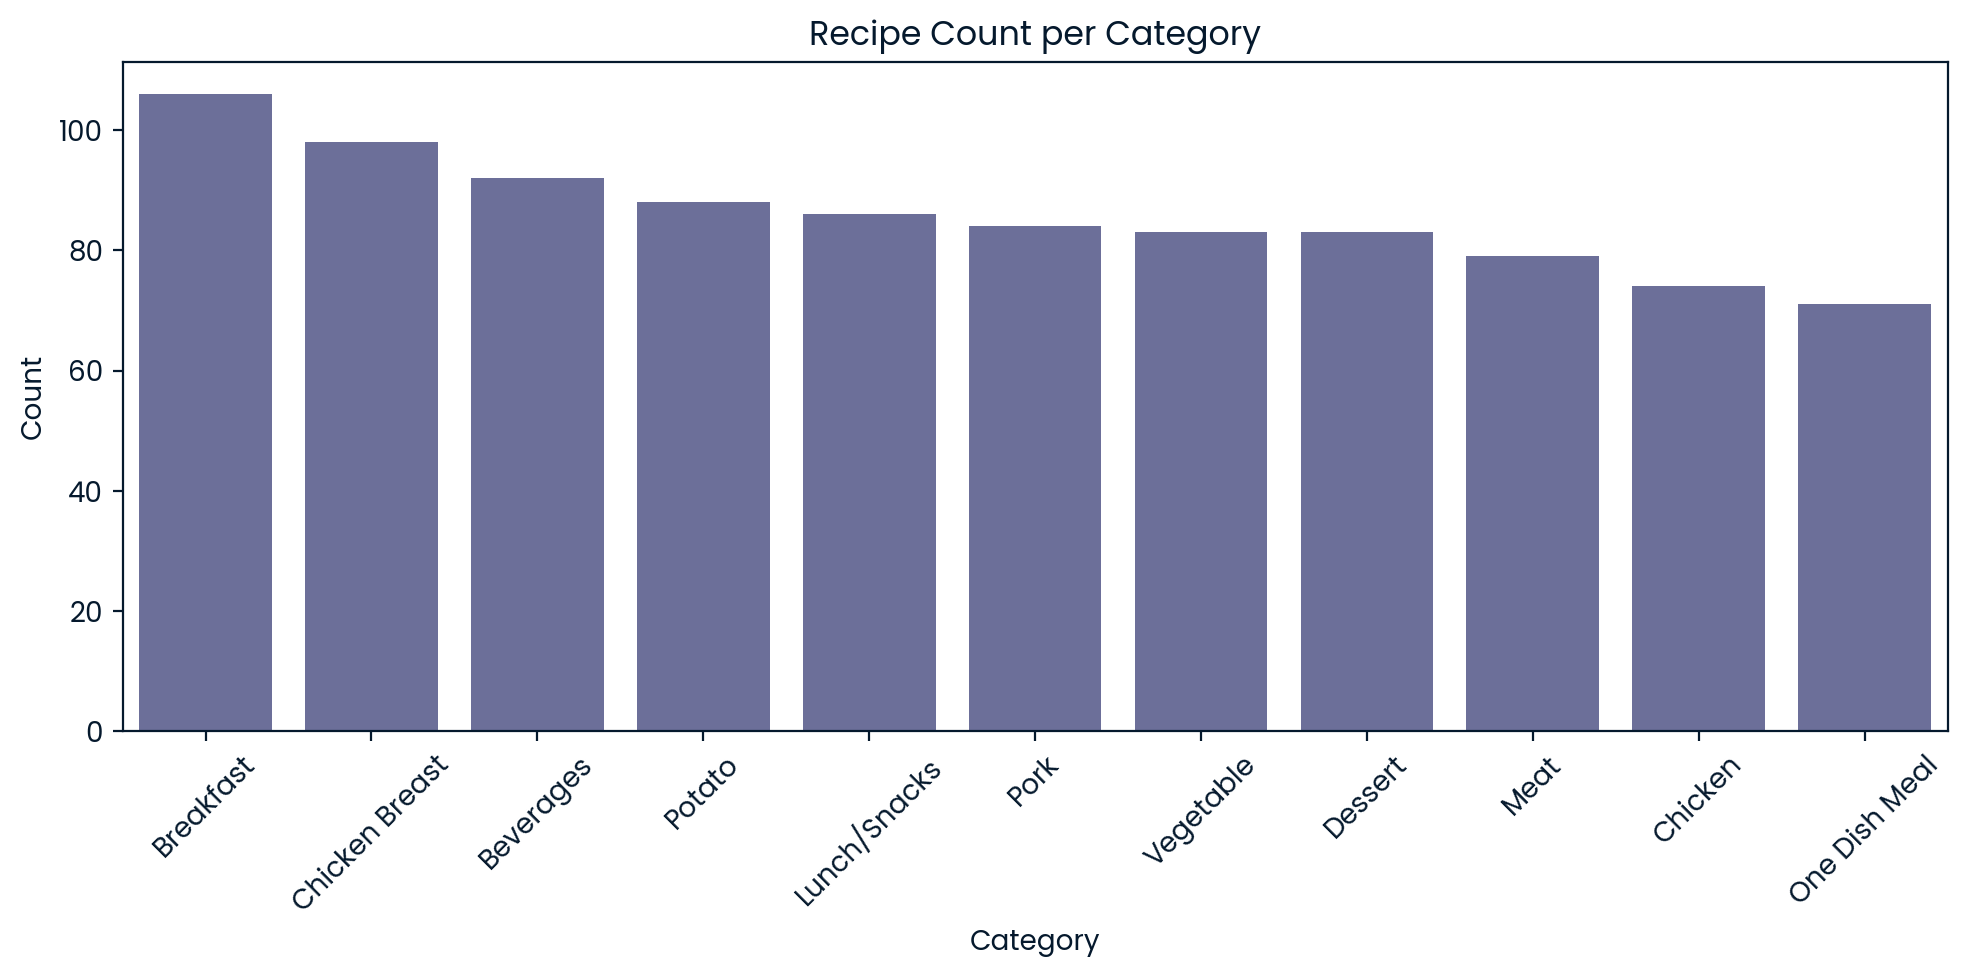

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot of recipe counts per category
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Recipe Count per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Second univariable plot


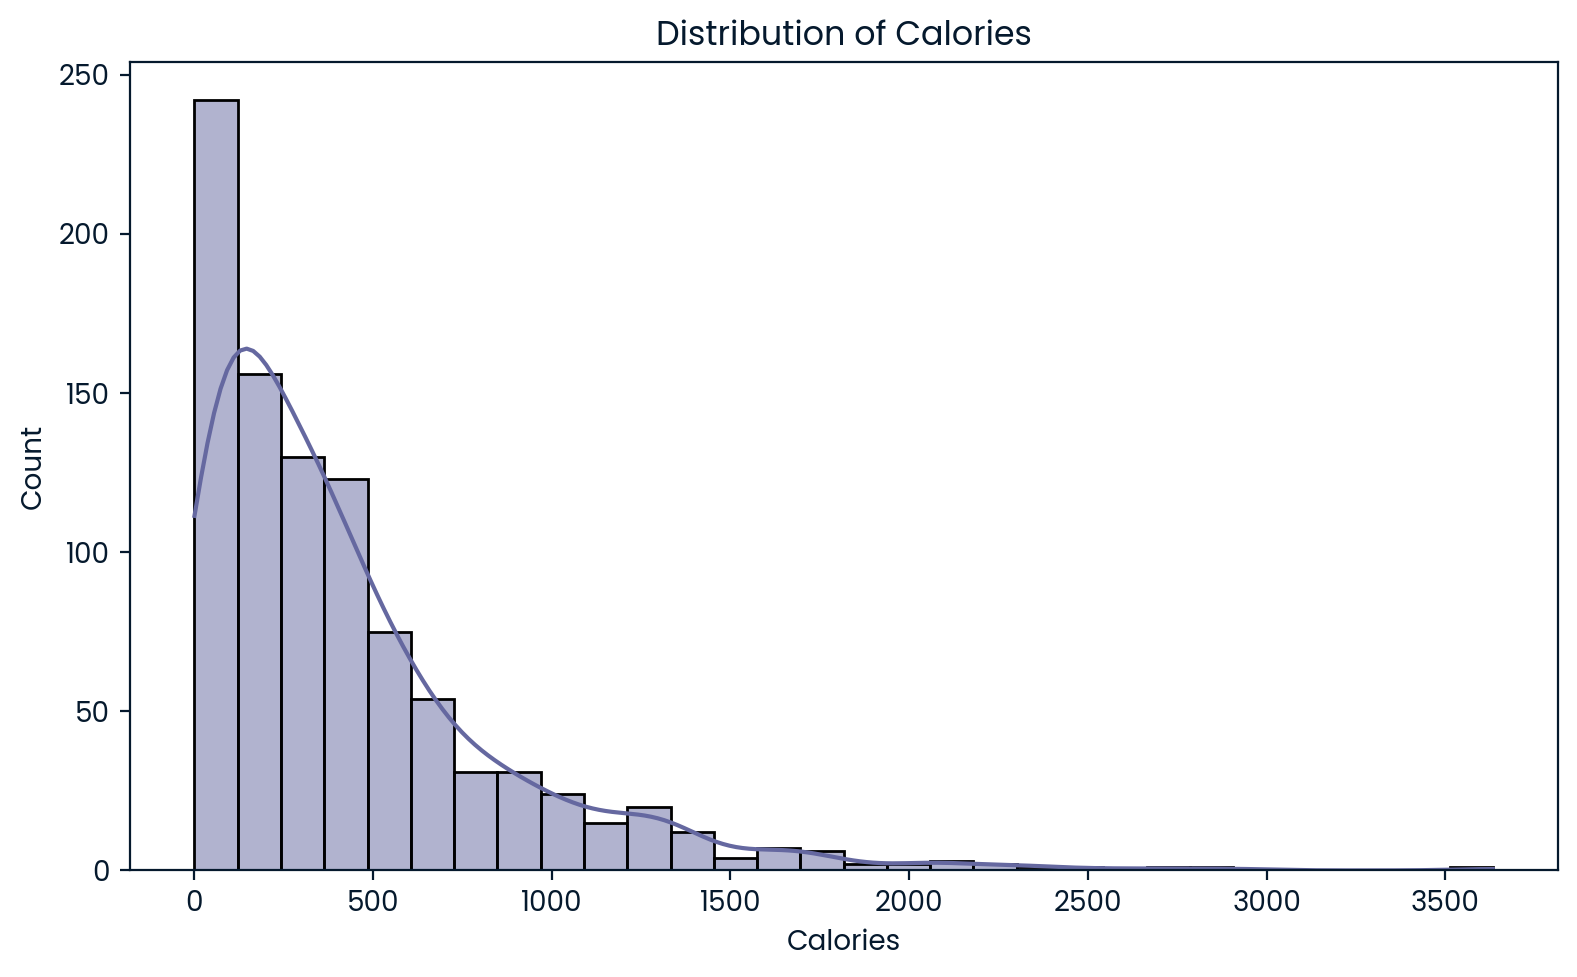

In [14]:
# Histogram of calories
plt.figure(figsize=(8, 5))
sns.histplot(df['calories'], bins=30, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


##  first Multivariable box plot
****

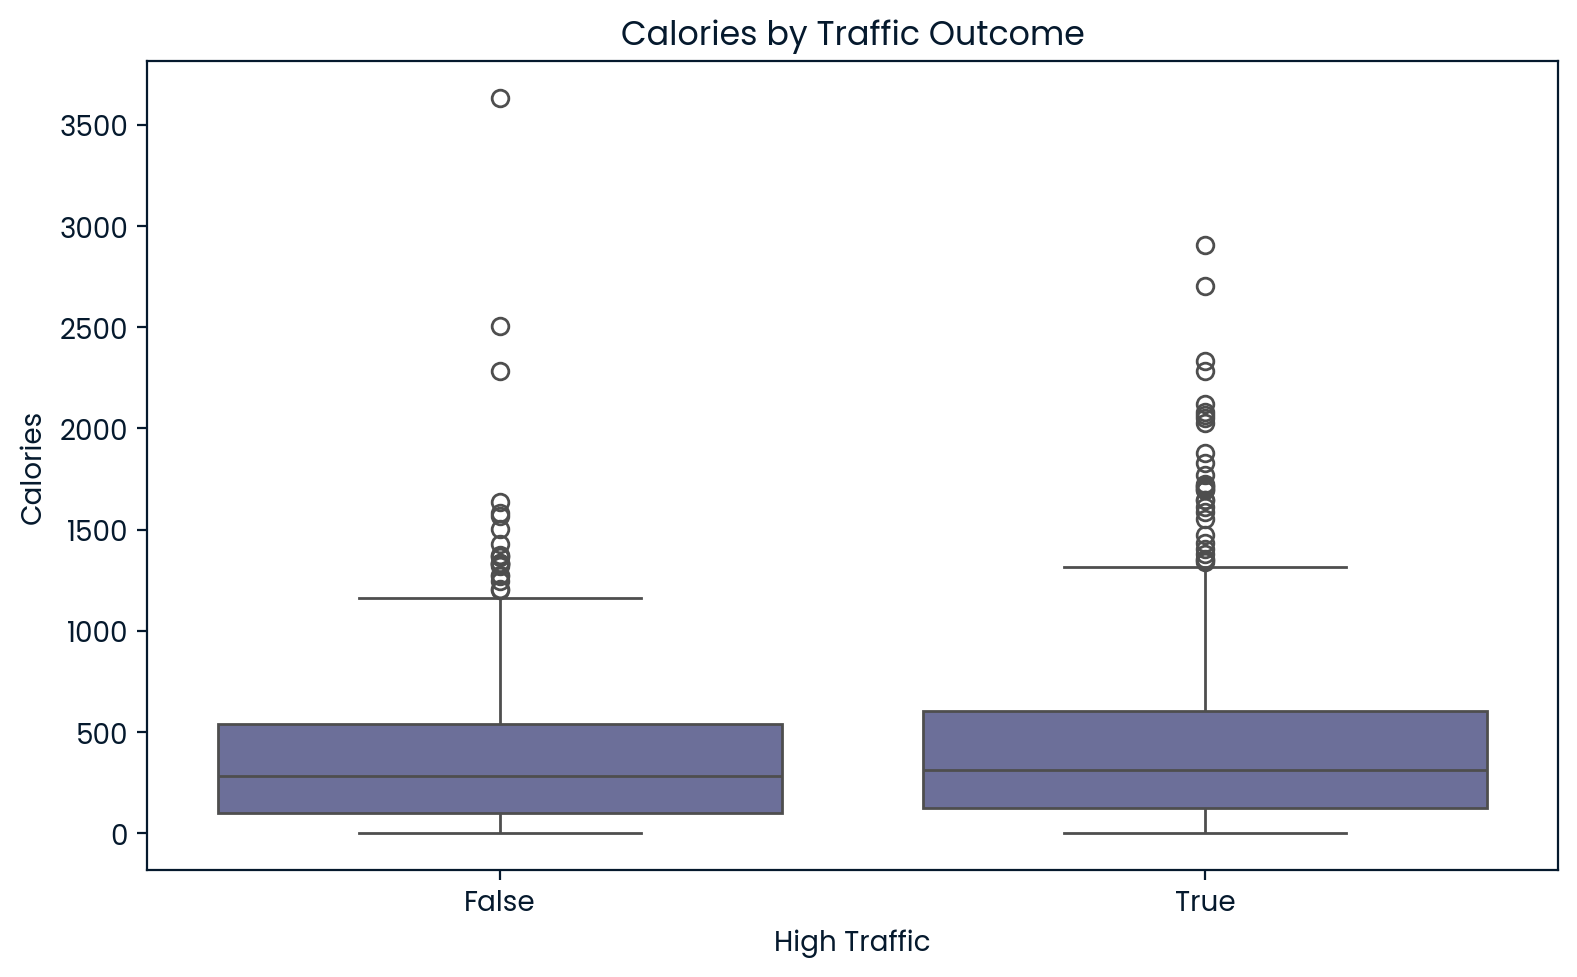

In [15]:
# Boxplot of calories grouped by traffic level
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='high_traffic', y='calories')
plt.title('Calories by Traffic Outcome')
plt.xlabel('High Traffic')
plt.ylabel('Calories')
plt.tight_layout()
plt.show()


### Second multivar box plot


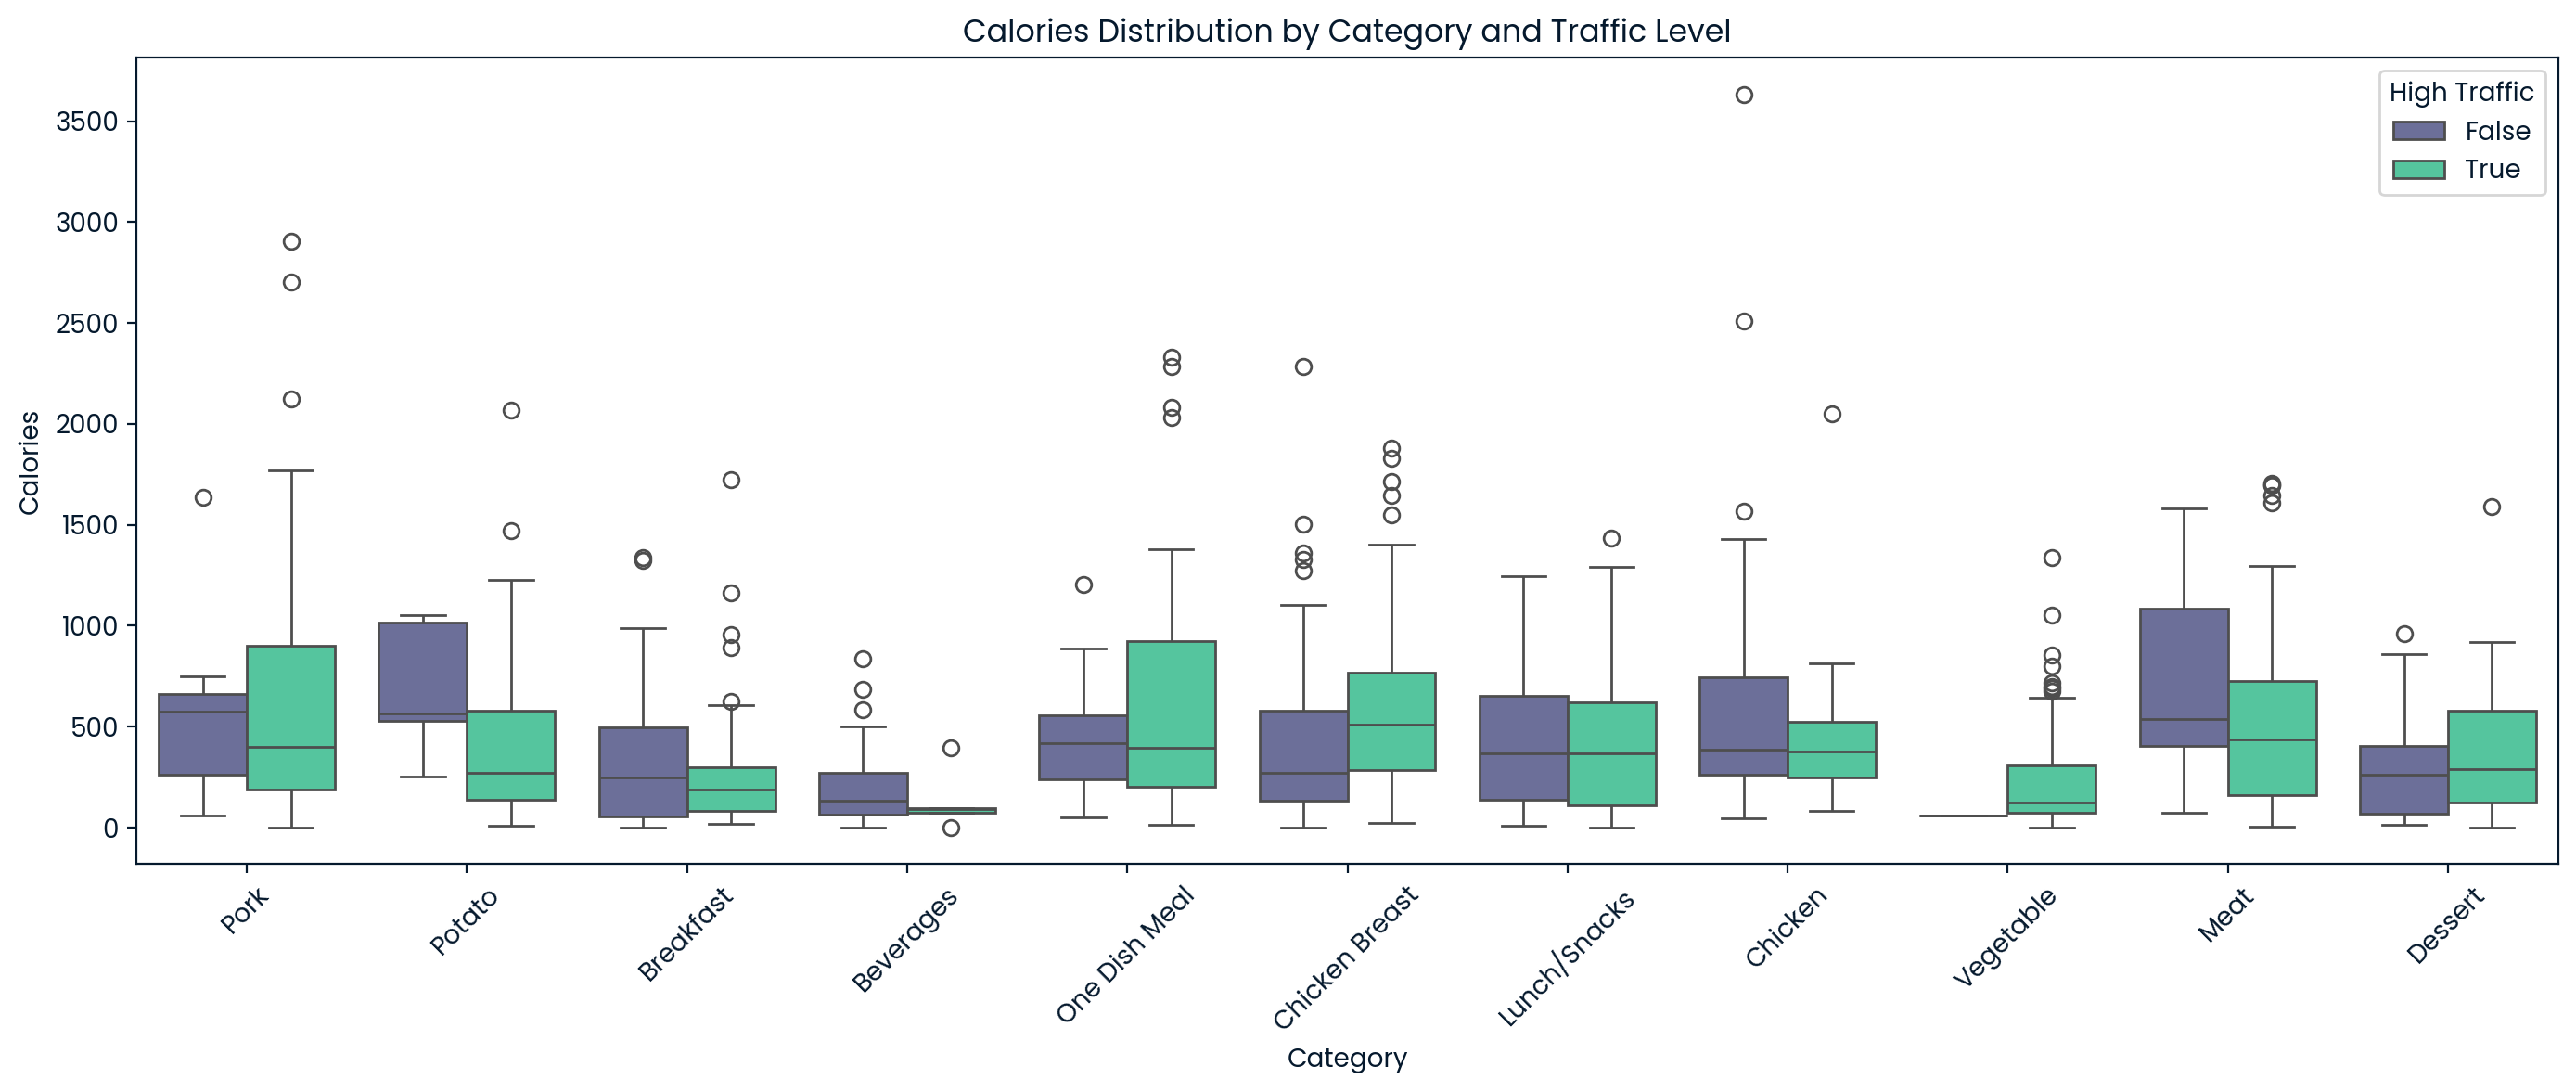

In [16]:

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='category', y='calories', hue='high_traffic')
plt.title('Calories Distribution by Category and Traffic Level')
plt.xlabel('Category')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.legend(title='High Traffic')
plt.tight_layout()
plt.show()

# Summary of the EDA
### Exploratory Data Analysis Summary

- **Recipe Categories:** The most common types of recipes are [Breakfast, chicken breast], while [a one dish meal] is less represented.
- **Calories:** The majority of recipes fall between 0–500 calories. The distribution is [skewed/symmetric/multimodal].
- **Calories vs. High Traffic:** Both groups (High and Not High traffic) have similar medians around ~300–400 calories.

However, high-traffic recipes show:

A slightly wider interquartile range (IQR) → they are more varied.

More high-calorie outliers, with values exceeding 2000+ calories.

Low-traffic recipes are more concentrated under 500–600 calories, with fewer extreme values. this suggest:Calories may contribute weakly to prediction

Nutritional features might be more informative in combination with others (e.g., category or servings)




# Model fitting
It’s a binary classification task:

Predict whether a recipe will generate high traffic (True or False) using its features.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Feature columns and target
features = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings']
target = 'high_traffic'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.2, stratify=df[target], random_state=42
)

# Preprocessing for numeric + categorical
numeric_features = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
categorical_features = ['category']

preprocessor = ColumnTransformer(transformers=[
    ('num', SimpleImputer(strategy='median'), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])
# Baseline pipeline
baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

baseline_pipeline.fit(X_train, y_train)
baseline_preds = baseline_pipeline.predict(X_test)
# Comparison pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_pipeline.fit(X_train, y_train)
rf_preds = rf_pipeline.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Logistic Regression Performance:")
print(classification_report(y_test, baseline_preds))
print("Accuracy:", accuracy_score(y_test, baseline_preds))

print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))


Logistic Regression Performance:
              precision    recall  f1-score   support

       False       0.71      0.73      0.72        74
        True       0.82      0.81      0.82       115

    accuracy                           0.78       189
   macro avg       0.77      0.77      0.77       189
weighted avg       0.78      0.78      0.78       189

Accuracy: 0.7777777777777778

Random Forest Performance:
              precision    recall  f1-score   support

       False       0.63      0.69      0.66        74
        True       0.79      0.74      0.76       115

    accuracy                           0.72       189
   macro avg       0.71      0.71      0.71       189
weighted avg       0.73      0.72      0.72       189

Accuracy: 0.7195767195767195


# 🧠 Model Development and Evaluation

We framed this task as a **binary classification problem** to predict whether a recipe will generate **high traffic** on the site.

#### ✅ Baseline Model: Logistic Regression
- Chosen for simplicity and interpretability
- **Accuracy**: 77.8%
- **Precision (High Traffic)**: 82%
- **Recall (High Traffic)**: 81%
- F1 score for high traffic: 82%

#### 🔁 Comparison Model: Random Forest Classifier
- Chosen to capture non-linear relationships and feature interactions
- **Accuracy**: 71.9%
- **Precision (High Traffic)**: 79%
- **Recall (High Traffic)**: 74%
- F1 score for high traffic: 76%

#### 📊 Model Comparison
- **Logistic Regression outperformed Random Forest** on all major metrics.
- It achieved **higher precision and recall**, and a better F1 score for predicting high-traffic recipes.
- Despite the Random Forest's theoretical flexibility, it underperformed, possibly due to overfitting or noise sensitivity.

✅ **We recommend using Logistic Regression** as the production model for its balance of performance and simplicity.
### 🎯 Does the Model Meet Business Expectations?

The product team requested that we predict **high-traffic recipes correctly 80% of the time**.

Our best-performing model (Logistic Regression) achieved:
- **Precision for high traffic recipes: 82%**
- **Recall: 81%**

✅ Therefore, the model **meets and slightly exceeds** the requested performance target. It correctly identifies high-traffic recipes in 82% of predictions marked as "high".

We recommend moving forward with this model in production.


# 📈 Business Metric to Monitor

#### 🎯 Recommended Metric: Precision for High-Traffic Recipes

To align with the product team’s objective — “correctly predict high traffic recipes 80% of the time” — we recommend using **Precision** as the key business performance metric.

> **Precision = (True Positives) / (True Positives + False Positives)**

It answers:  
**“When the model predicts a recipe will be high traffic, how often is it actually high traffic?”**

#### 📊 Current Value (Logistic Regression):
- **Precision (High Traffic)**: **82%**

This metric should be tracked regularly to ensure ongoing model quality and business alignment.


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation